# data

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (20, 5)

In [48]:
data = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')
data.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [50]:
for idx in range(len(data)) : 
    release_split = data.loc[idx, 'release_time'].split('-')
    data.loc[idx,'year'] = np.int(release_split[0])
    data.loc[idx, 'month'] = np.int(release_split[1])
    data.loc[idx, 'day'] = np.int(release_split[2])
    
for idx in range(len(test)) : 
    release_split = test.loc[idx, 'release_time'].split('-')
    test.loc[idx,'year'] = np.int(release_split[0])
    test.loc[idx, 'month'] = np.int(release_split[1])
    test.loc[idx, 'day'] = np.int(release_split[2])

In [51]:
data.drop('release_time', axis = 1, inplace = True)
test.drop('release_time', axis = 1, inplace = True)

<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

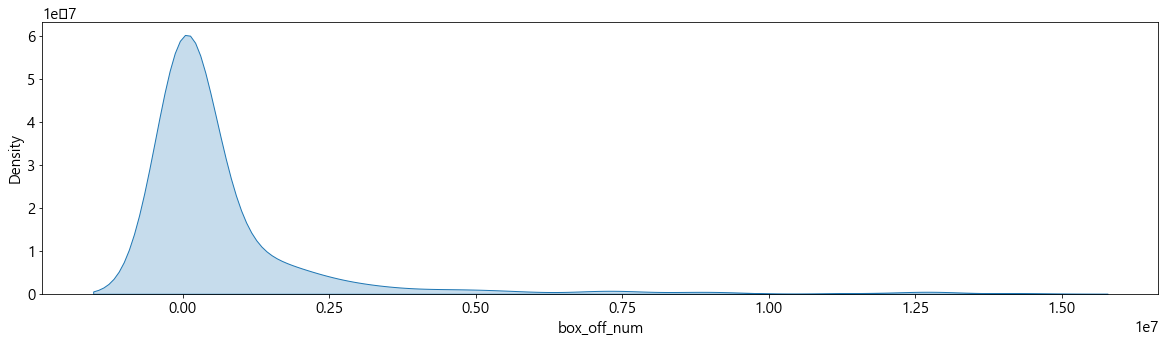

In [52]:
sns.kdeplot(x = 'box_off_num', data = data, shade = True)

In [53]:
print('최다 관객 수 : ',data['box_off_num'].max())
print('관객 수 중앙값: ',data['box_off_num'].median())
print('관객 수 평균: ',data['box_off_num'].mean())
print('최소 관객 수 : ',data['box_off_num'].min())

최다 관객 수 :  14262766
관객 수 중앙값:  12591.0
관객 수 평균:  708181.7516666667
최소 관객 수 :  1


In [54]:
print('Q1 : ',np.percentile(data['box_off_num'], 25))
print('Q3 : ',np.percentile(data['box_off_num'], 75))


Q1 :  1297.25
Q3 :  479886.75


## missing 

In [55]:
data.isnull().sum()

title               0
distributor         0
genre               0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
year                0
month               0
day                 0
dtype: int64

In [56]:
data[(data['dir_prev_bfnum'].isnull()) & (data['dir_prev_num']>0)]

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,day


이전 작품 평균 관객 수가 NA인 경우 이전에 제작에 참여한 영화의 개수가 0임을 알 수 있다
> 0으로 대체

In [57]:
data['dir_prev_bfnum'] = data['dir_prev_bfnum'].fillna(0)
test['dir_prev_bfnum'] = test['dir_prev_bfnum'].fillna(0)

## 제목

In [58]:
# 제목은 unique하기 때문에 필요 없음 
data['title'].nunique()

600

In [59]:
#data.drop('title', axis = 1, inplace = True)

## 배급사

In [60]:
# 배급사
data['distributor'].nunique()

169

169개의 배급사가 있음 -> 배급사별 평균 관객 수는 차이가 있는지 검정

In [61]:
data['distributor'] = data['distributor'].str.replace('\(주\)', '')
data['distributor'] = data['distributor'].str.replace(' ', '')

test['distributor'] = test['distributor'].str.replace('\(주\)', '')
test['distributor'] = test['distributor'].str.replace(' ', '')

In [62]:
data['distributor'].unique()

array(['롯데엔터테인먼트', '쇼박스', 'NEW', '쇼박스미디어플렉스', '백두대간', '유니버설픽쳐스인터내셔널코리아',
       '두타연', '케이알씨지', '콘텐츠윙', '키노아이', '팝파트너스', 'CJE&M영화부문', '영화제작전원사',
       'CJE&MPictures', 'CGV무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ엔터테인먼트',
       'CGV아트하우스', '조이앤시네마', '인디플러그', '콘텐츠판다', '인디스토리', '팝엔터테인먼트',
       '시네마서비스', '웃기씨네', '영화사진진', '레인보우팩토리', '김기덕필름', 'CJCGV',
       '동국대학교충무로영상제작센터', 'BoXoo엔터테인먼트', '마운틴픽쳐스', '메가박스플러스엠', '골든타이드픽처스',
       '파이오니아21', '디씨드', '드림팩트엔터테인먼트', '시너지', '디마엔터테인먼트', '판다미디어',
       '스톰픽쳐스코리아', '예지림엔터테인먼트', '영화사조제', '보람엔터테인먼트', '시네마달', '노바엔터테인먼트',
       '패스파인더씨앤씨', '대명문화공장', '온비즈넷', 'KT&G상상마당', '무비꼴라쥬', '인벤트디',
       '씨네그루키다리이엔티', '스튜디오후크', '나이너스엔터테인먼트', 'THE픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션픽처스', '이스트스카이필름', '필라멘트픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴픽처스', '휘엔터테인먼트', '이십세기폭스코리아', '피터팬픽쳐스', '에스와이코마드', '더픽쳐스',
       '오퍼스픽쳐스', '고앤고필름', '사람과사람들', 'JK필름', '씨너스엔터테인먼트', 'KT', '싸이더스FNH',
       '프레인글로벌', '나우콘텐츠', '홀리가든', '브릿지웍스', '엣나인필름', '위더스필름', '에이원엔터테인먼트',
       'OAL(올)', 

In [63]:
# https://dacon.io/competitions/open/235536/codeshare/2721?page=1&dtype=recent

def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [64]:
data['distributor'] = data['distributor'].apply(get_dis) 
test['distributor'] = test['distributor'].apply(get_dis) 

In [65]:
box_off_num_by_distributor = data.groupby('distributor')['box_off_num'].median().sort_values(ascending = False)

In [66]:
box_off_num_by_distributor = box_off_num_by_distributor.to_frame().\
sort_values('box_off_num', ascending = False)
box_off_num_by_distributor

,box_off_num
distributor,
아이필름코퍼레이션,3117859.0
영구아트무비,2541603.0
쇼박스,2138560.0
이십세기폭스코리아,1422844.0
전망좋은영화사,1214237.0
...,...
나우콘텐츠,54.0
위드시네마,46.0
사람과사람들,42.0


In [67]:
dist_rank = box_off_num_by_distributor['box_off_num'].rank().astype(int)
dist_rank

distributor
아이필름코퍼레이션     147
영구아트무비        146
쇼박스           145
이십세기폭스코리아     144
전망좋은영화사       143
             ... 
나우콘텐츠           5
위드시네마           4
사람과사람들          3
고구마공작소          2
인피니티엔터테인먼트      1
Name: box_off_num, Length: 147, dtype: int32

In [68]:
data['dist_rank'] = [dist_rank[s].astype(int) if s in dist_rank else 0 for s in data['distributor']]
data.drop('distributor', axis = 1, inplace = True)

test['dist_rank'] = [dist_rank[s].astype(int) if s in dist_rank else 0 for s in test['distributor']]
test.drop('distributor', axis = 1, inplace = True)

## 장르

In [69]:
data.groupby('genre')['box_off_num'].mean()

genre
SF        1.788346e+06
공포        5.908325e+05
느와르       2.263695e+06
다큐멘터리     6.717226e+04
드라마       6.256898e+05
멜로/로맨스    4.259680e+05
뮤지컬       6.627000e+03
미스터리      5.275482e+05
서스펜스      8.261100e+04
애니메이션     1.819267e+05
액션        2.203974e+06
코미디       1.193914e+06
Name: box_off_num, dtype: float64

<AxesSubplot:xlabel='genre', ylabel='box_off_num'>

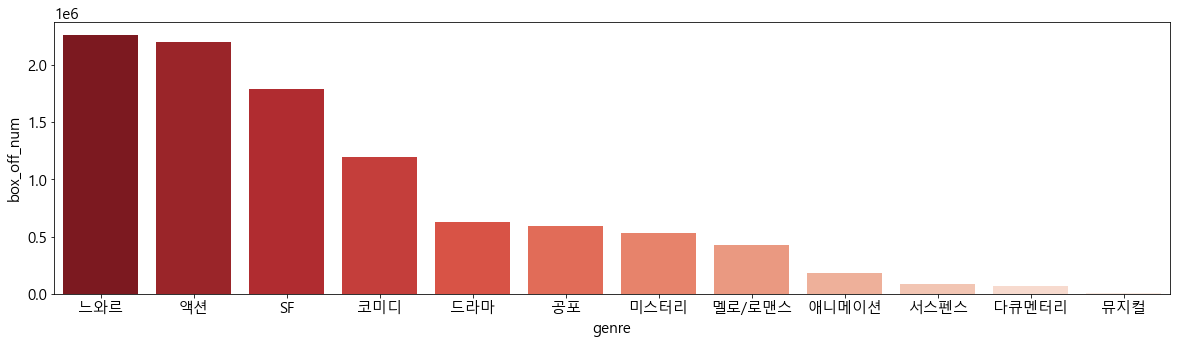

In [70]:
# 장르 
num_by_genre = data.groupby(['genre'])['box_off_num'].mean().\
to_frame().sort_values(by = 'box_off_num', ascending = False)
sns.barplot(x = num_by_genre.index, y = 'box_off_num',
            data = num_by_genre, palette = 'Reds_r')

In [71]:
num_by_genre['genre_rank'] = num_by_genre['box_off_num'].rank().astype(int)
num_by_genre

,box_off_num,genre_rank
genre,,
느와르,2.263695e+06,12
액션,2.203974e+06,11
SF,1.788346e+06,10
코미디,1.193914e+06,9
드라마,6.256898e+05,8
공포,5.908325e+05,7
미스터리,5.275482e+05,6
멜로/로맨스,4.259680e+05,5
애니메이션,1.819267e+05,4


In [72]:
data['genre_rank'] = [num_by_genre.loc[gen]['genre_rank'].astype(int) for gen in data['genre']]
test['genre_rank'] = [num_by_genre.loc[gen]['genre_rank'].astype(int) for gen in test['genre']]

In [73]:
data.drop('genre', axis = 1, inplace = True)
test.drop('genre', axis = 1, inplace = True)

## 상영시간

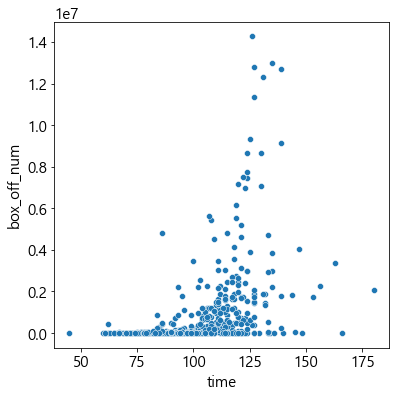

In [74]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'time', y = 'box_off_num', data = data)
plt.show()

## 개봉일

<AxesSubplot:xlabel='year', ylabel='box_off_num'>

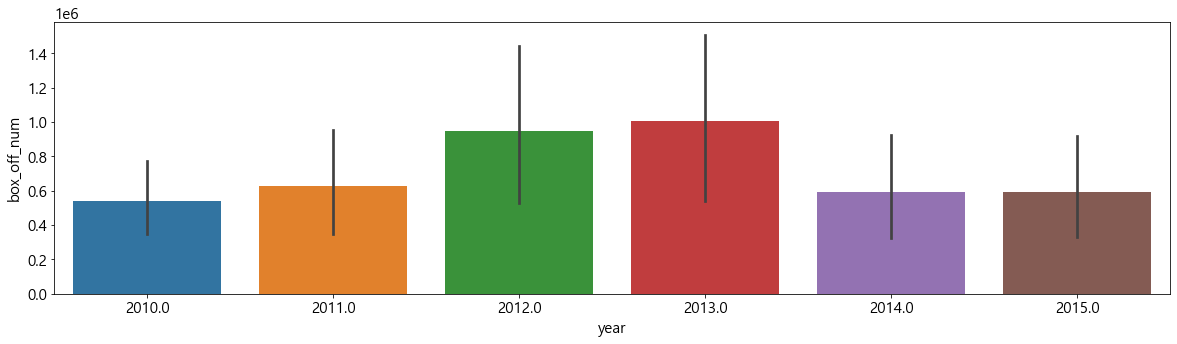

In [75]:
sns.barplot(x = 'year', y = 'box_off_num', data = data)

<AxesSubplot:xlabel='month', ylabel='box_off_num'>

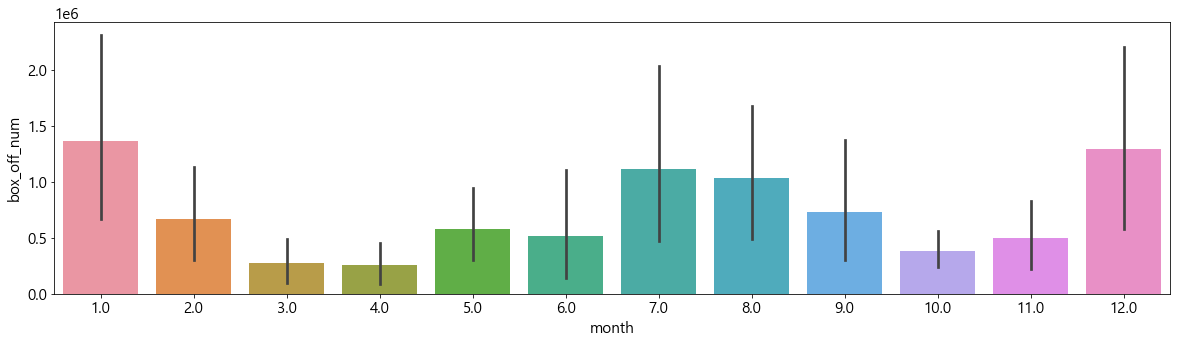

In [76]:
sns.barplot(x = 'month', y = 'box_off_num', data = data)

In [77]:
data['vacation'] = [1 if s in [1., 7., 8., 12.] else 0 for s in data['month']]
test['vacation'] = [1 if s in [1., 7., 8., 12.] else 0 for s in test['month']]

In [78]:
data.drop(['day'], axis = 1, inplace = True)
test.drop(['day'], axis = 1, inplace = True)

## 상영등급

<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

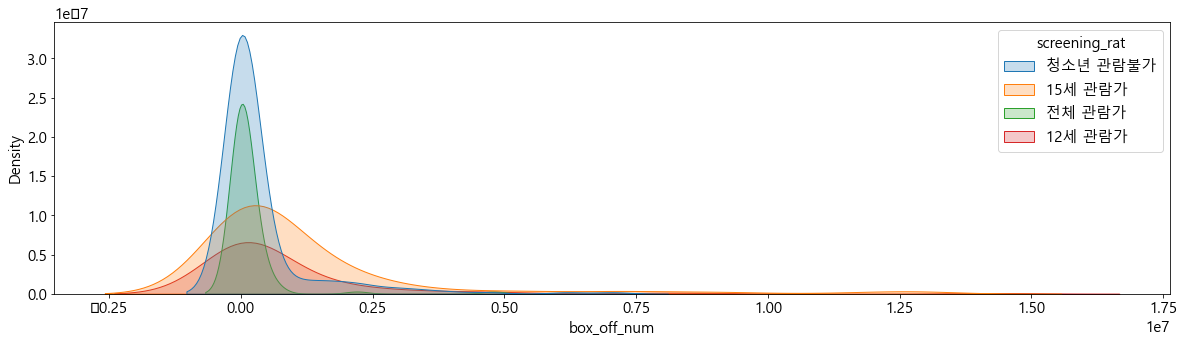

In [79]:
sns.kdeplot(x = 'box_off_num', hue = 'screening_rat',
            shade = True, data = data)

## 감독이름

In [80]:
director_over_50K = data.groupby(['director'])['dir_prev_bfnum'].mean() >= 10000
director_over_50K = director_over_50K[director_over_50K == True].index

In [81]:
director_over_50K

Index(['강우석', '강형철', '강효진', '경순', '계윤식', '고구마', '곽경택', '구자홍', '국동석', '권칠인',
       ...
       '한재림', '한종훈', '한준희', '허종호', '홍석재', '홍원찬', '홍지영', '황동혁', '황유식', '황인호'],
      dtype='object', name='director', length=172)

In [82]:
data['director_over_50K'] = [1 if s in director_over_50K else 0 for s in data['director']]
test['director_over_50K'] = [1 if s in director_over_50K else 0 for s in test['director']]

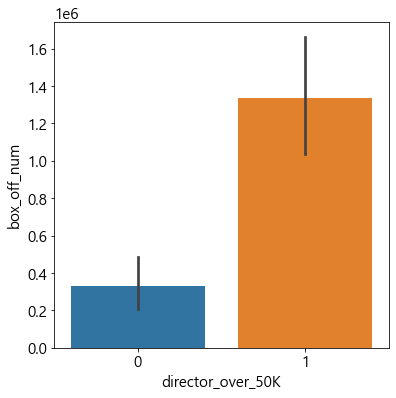

In [83]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'director_over_50K', y = 'box_off_num', data = data)
plt.show()

<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

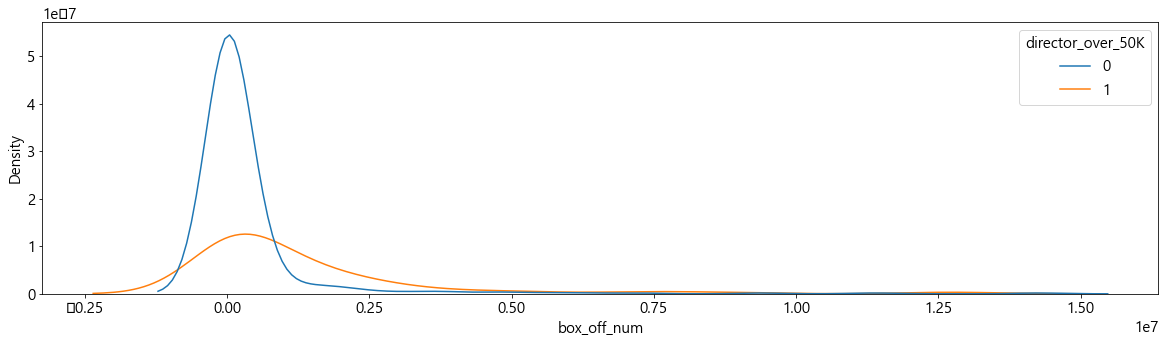

In [84]:
sns.kdeplot(x = 'box_off_num', hue = 'director_over_50K', data = data)

등분산성에 대한 귀무가설 기각 

In [85]:
from scipy.stats import bartlett
bartlett(data[data['director_over_50K'] == 0]['box_off_num'],
         data[data['director_over_50K'] == 1]['box_off_num'])

BartlettResult(statistic=91.40480895566843, pvalue=1.1709155464675876e-21)

In [86]:
from scipy.stats import ttest_ind
ttest_ind(data[data['director_over_50K'] == 0]['box_off_num'],
         data[data['director_over_50K'] == 1]['box_off_num'],
         equal_var = False)

Ttest_indResult(statistic=-5.928233317511703, pvalue=8.080688384463698e-09)

2번 이상 영화를 개봉한 감독과 1번 개봉한 감독의 관객 수에는 유의한 차이가 있음 

In [87]:
director_over_2times = data['director'].value_counts() >= 2
director_over_2times = director_over_2times[director_over_2times == True].index

In [88]:
data['director_over_2times'] = [1 if s in director_over_2times else 0 for s in data['director']]
test['director_over_2times'] = [1 if s in director_over_2times else 0 for s in test['director']]

In [89]:
from scipy.stats import bartlett
bartlett(data[data['director_over_2times'] == 0]['box_off_num'],
         data[data['director_over_2times'] == 1]['box_off_num'])

BartlettResult(statistic=25.117796344218554, pvalue=5.393282290878355e-07)

In [90]:
from scipy.stats import ttest_ind
ttest_ind(data[data['director_over_2times'] == 0]['box_off_num'],
         data[data['director_over_2times'] == 1]['box_off_num'],
         equal_var = False)

Ttest_indResult(statistic=-2.1129115361985686, pvalue=0.03526281816283866)

<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

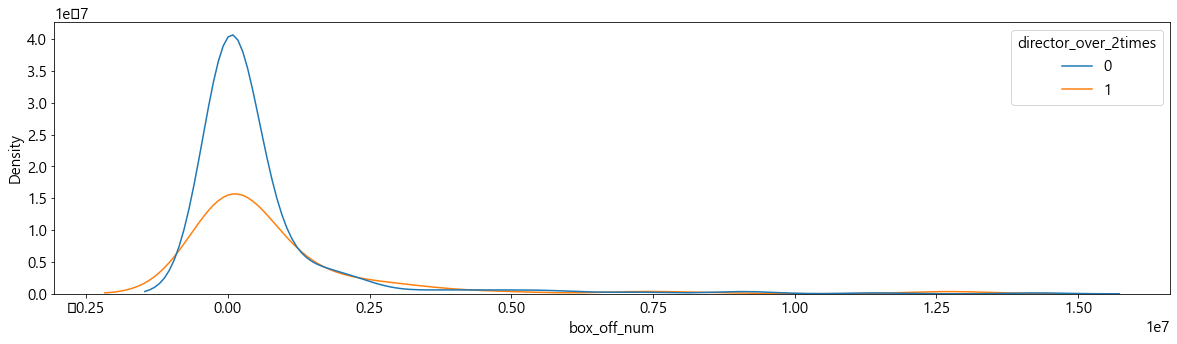

In [91]:
sns.kdeplot(x = 'box_off_num', hue = 'director_over_2times', data = data)

## 해당 감독의 이전 영화 수 & 평균 관객 수 

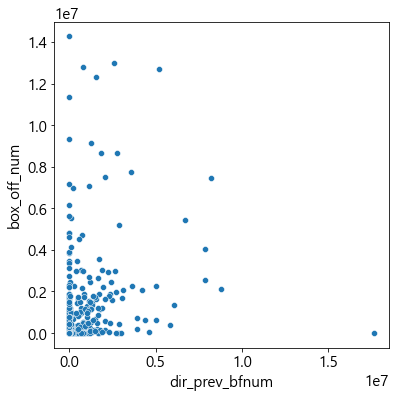

In [92]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'dir_prev_bfnum', y = 'box_off_num', data = data)
plt.show()

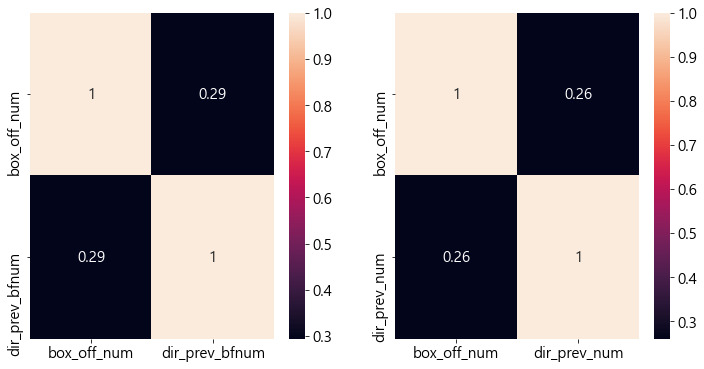

In [93]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.heatmap(data[['box_off_num', 'dir_prev_bfnum']].corr(), annot = True, ax = ax[0])
sns.heatmap(data[['box_off_num', 'dir_prev_num']].corr(), annot = True, ax = ax[1])
plt.show()

In [94]:
data['dir_prev_bfnum_log'] = np.log1p(data['dir_prev_bfnum'])
test['dir_prev_bfnum_log'] = np.log1p(test['dir_prev_bfnum'])

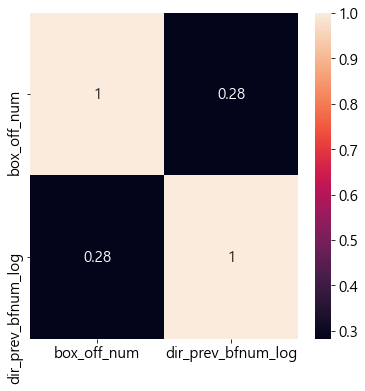

In [95]:
plt.figure(figsize = (6, 6))
sns.heatmap(data[['box_off_num', 'dir_prev_bfnum_log']].corr(), annot = True)
plt.show()

## 스탭 수

<AxesSubplot:xlabel='num_staff', ylabel='Count'>

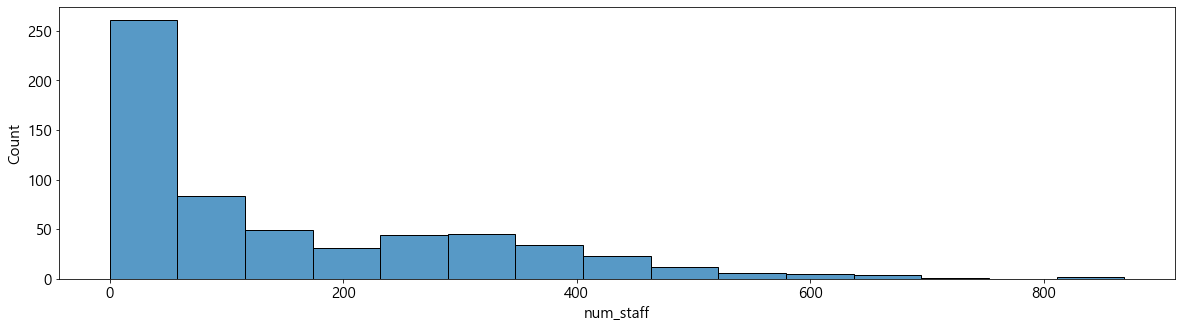

In [96]:
sns.histplot(x = 'num_staff', data = data)

In [97]:
data['num_staff'] = np.log1p(data['num_staff'])
test['num_staff'] = np.log1p(test['num_staff'])

<AxesSubplot:xlabel='num_staff', ylabel='Count'>

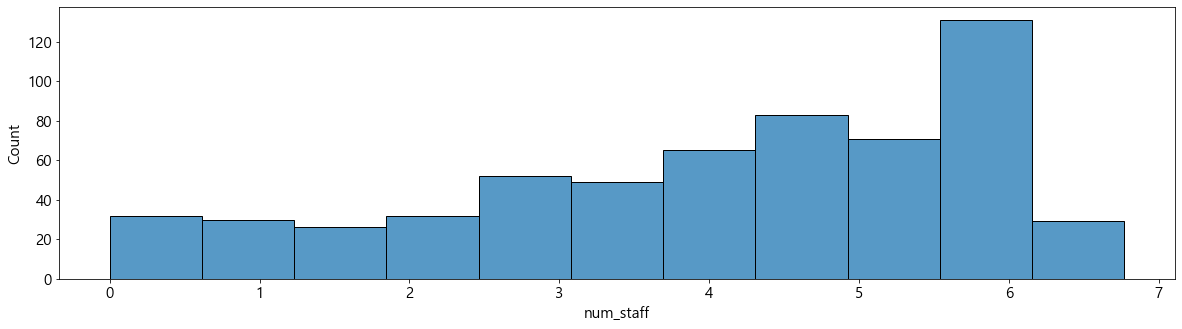

In [98]:
sns.histplot(x = 'num_staff', data = data)

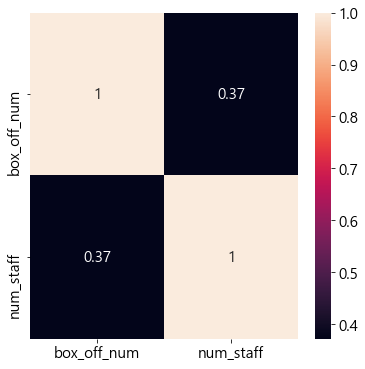

In [99]:
plt.figure(figsize = (6, 6))
sns.heatmap(data[['box_off_num', 'num_staff']].corr(), annot = True)
plt.show()

스탭 수가 많아질수록 제작비가 높은 영화이기 때문에 관객 수가 많아질 것 

## 배우 수 

<AxesSubplot:xlabel='num_actor', ylabel='Count'>

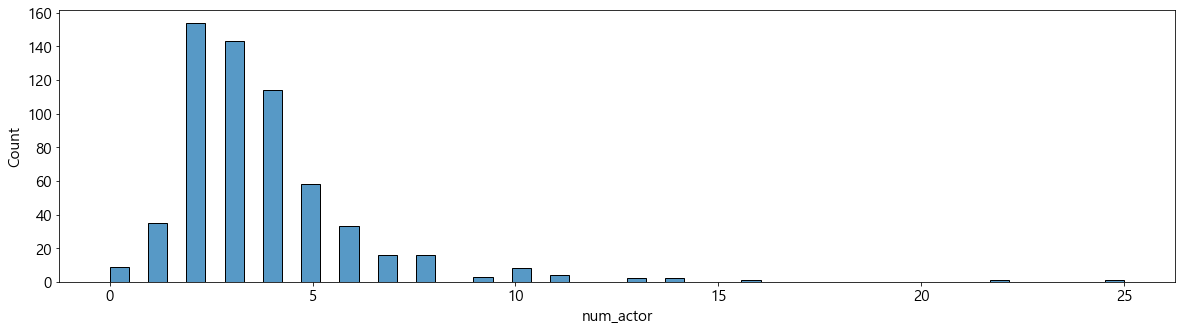

In [100]:
sns.histplot(x = 'num_actor', data = data)

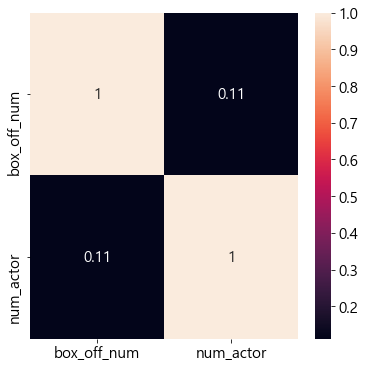

In [101]:
plt.figure(figsize = (6, 6))
sns.heatmap(data[['box_off_num', 'num_actor']].corr(), annot = True)
plt.show()

<AxesSubplot:xlabel='num_actor', ylabel='box_off_num'>

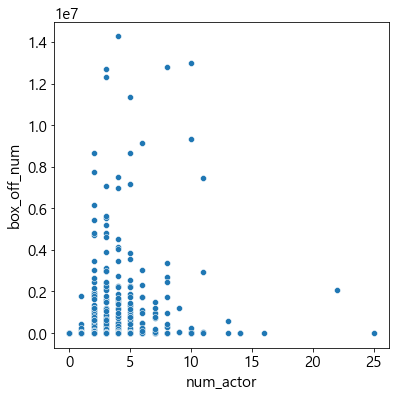

In [102]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'num_actor', y = 'box_off_num', data = data)

# train/test split

In [103]:
y_train = data['box_off_num']
select_features = ['dist_rank', 'time', 'num_staff', 'num_actor', 
                   'genre_rank', 'screening_rat']
X_train = data[select_features]
test = test[select_features]

In [104]:
X_train = pd.get_dummies(columns =['screening_rat'], data = X_train)
test = pd.get_dummies(columns =[ 'screening_rat'], data = test)

<AxesSubplot:xlabel='box_off_num', ylabel='Count'>

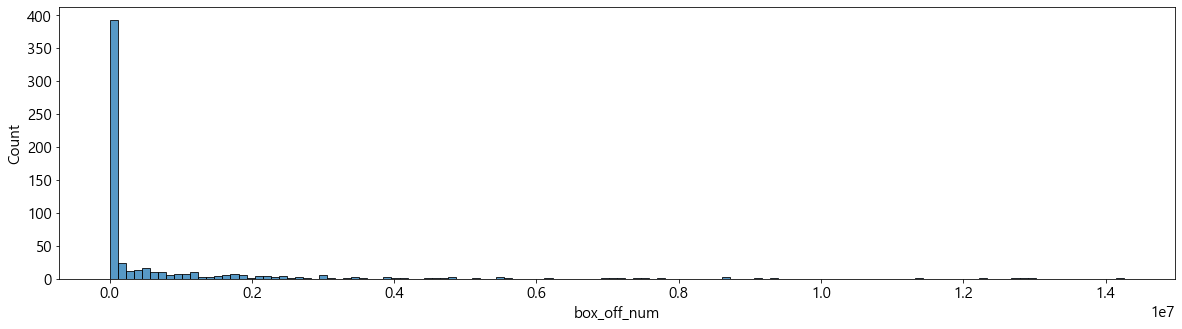

In [105]:
sns.histplot(y_train)

In [106]:
y_train = np.log1p(y_train)

<AxesSubplot:xlabel='box_off_num', ylabel='Count'>

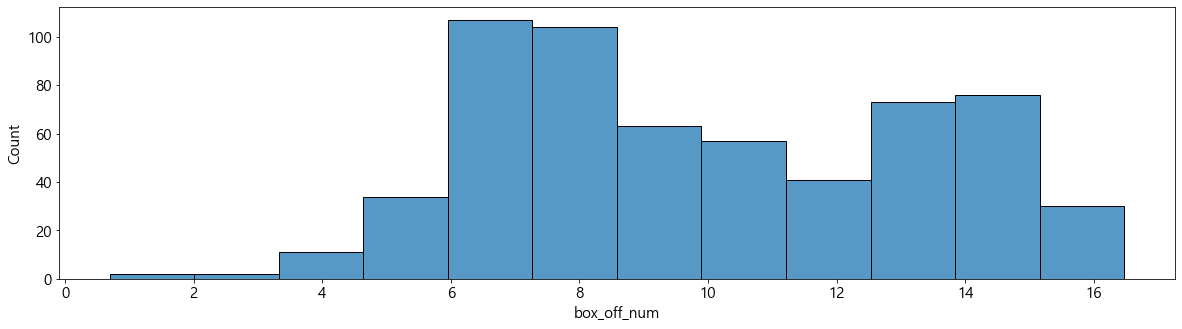

In [107]:
sns.histplot(y_train)

# model

In [108]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [109]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)

## Gradient Boosting Regressor

In [110]:
gbm = GradientBoostingRegressor(random_state = 0)
rmse_list = []
gbm_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    gbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    gbm_preds += (sub_pred / 10)

In [111]:
np.mean(rmse_list) # 1183312.1916131715

1183312.1916131715

## random forest

In [112]:
rf = RandomForestRegressor(random_state = 0)
rmse_list = []
rf_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_preds += (sub_pred / 10)

In [113]:
np.mean(rmse_list) # 889228.5414681748

889228.5414681748

## CatBoost

In [114]:
cb = CatBoostRegressor(random_state = 0)
rmse_list = []
cb_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    cb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in cb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cb.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cb_preds += (sub_pred / 10)

Learning rate set to 0.037145
0:	learn: 3.2384068	total: 162ms	remaining: 2m 42s
1:	learn: 3.1557328	total: 167ms	remaining: 1m 23s
2:	learn: 3.0807782	total: 172ms	remaining: 57s
3:	learn: 3.0100167	total: 175ms	remaining: 43.5s
4:	learn: 2.9368502	total: 177ms	remaining: 35.3s
5:	learn: 2.8720181	total: 180ms	remaining: 29.8s
6:	learn: 2.8104664	total: 182ms	remaining: 25.8s
7:	learn: 2.7541098	total: 183ms	remaining: 22.7s
8:	learn: 2.6929537	total: 185ms	remaining: 20.4s
9:	learn: 2.6365446	total: 187ms	remaining: 18.5s
10:	learn: 2.5814060	total: 188ms	remaining: 16.9s
11:	learn: 2.5273264	total: 189ms	remaining: 15.6s
12:	learn: 2.4757126	total: 191ms	remaining: 14.5s
13:	learn: 2.4304782	total: 192ms	remaining: 13.5s
14:	learn: 2.3861229	total: 194ms	remaining: 12.7s
15:	learn: 2.3382390	total: 195ms	remaining: 12s
16:	learn: 2.2945789	total: 197ms	remaining: 11.4s
17:	learn: 2.2535020	total: 198ms	remaining: 10.8s
18:	learn: 2.2181934	total: 199ms	remaining: 10.3s
19:	learn: 2.

305:	learn: 1.0840956	total: 444ms	remaining: 1.01s
306:	learn: 1.0825897	total: 445ms	remaining: 1s
307:	learn: 1.0805598	total: 446ms	remaining: 1s
308:	learn: 1.0804456	total: 447ms	remaining: 999ms
309:	learn: 1.0792910	total: 448ms	remaining: 997ms
310:	learn: 1.0792153	total: 449ms	remaining: 994ms
311:	learn: 1.0787679	total: 449ms	remaining: 991ms
312:	learn: 1.0787079	total: 450ms	remaining: 988ms
313:	learn: 1.0786402	total: 451ms	remaining: 986ms
314:	learn: 1.0783450	total: 452ms	remaining: 983ms
315:	learn: 1.0768581	total: 453ms	remaining: 980ms
316:	learn: 1.0756639	total: 454ms	remaining: 978ms
317:	learn: 1.0734947	total: 455ms	remaining: 975ms
318:	learn: 1.0720184	total: 456ms	remaining: 973ms
319:	learn: 1.0701937	total: 457ms	remaining: 970ms
320:	learn: 1.0679417	total: 457ms	remaining: 968ms
321:	learn: 1.0671742	total: 458ms	remaining: 965ms
322:	learn: 1.0649928	total: 459ms	remaining: 963ms
323:	learn: 1.0628539	total: 460ms	remaining: 960ms
324:	learn: 1.0601

612:	learn: 0.7877108	total: 721ms	remaining: 455ms
613:	learn: 0.7865282	total: 722ms	remaining: 454ms
614:	learn: 0.7864150	total: 723ms	remaining: 453ms
615:	learn: 0.7852095	total: 725ms	remaining: 452ms
616:	learn: 0.7851892	total: 726ms	remaining: 450ms
617:	learn: 0.7844453	total: 727ms	remaining: 449ms
618:	learn: 0.7832782	total: 728ms	remaining: 448ms
619:	learn: 0.7824640	total: 729ms	remaining: 447ms
620:	learn: 0.7811276	total: 729ms	remaining: 445ms
621:	learn: 0.7810776	total: 730ms	remaining: 444ms
622:	learn: 0.7806103	total: 732ms	remaining: 443ms
623:	learn: 0.7797837	total: 733ms	remaining: 442ms
624:	learn: 0.7783387	total: 734ms	remaining: 441ms
625:	learn: 0.7772743	total: 735ms	remaining: 439ms
626:	learn: 0.7768393	total: 736ms	remaining: 438ms
627:	learn: 0.7762636	total: 737ms	remaining: 437ms
628:	learn: 0.7752030	total: 738ms	remaining: 435ms
629:	learn: 0.7741930	total: 739ms	remaining: 434ms
630:	learn: 0.7730489	total: 740ms	remaining: 433ms
631:	learn: 

835:	learn: 0.6543624	total: 990ms	remaining: 194ms
836:	learn: 0.6535445	total: 991ms	remaining: 193ms
837:	learn: 0.6535324	total: 992ms	remaining: 192ms
838:	learn: 0.6527970	total: 994ms	remaining: 191ms
839:	learn: 0.6519822	total: 995ms	remaining: 189ms
840:	learn: 0.6519060	total: 996ms	remaining: 188ms
841:	learn: 0.6512030	total: 997ms	remaining: 187ms
842:	learn: 0.6498409	total: 998ms	remaining: 186ms
843:	learn: 0.6497803	total: 999ms	remaining: 185ms
844:	learn: 0.6495405	total: 1s	remaining: 183ms
845:	learn: 0.6491660	total: 1s	remaining: 182ms
846:	learn: 0.6491544	total: 1s	remaining: 181ms
847:	learn: 0.6490146	total: 1s	remaining: 180ms
848:	learn: 0.6481475	total: 1s	remaining: 179ms
849:	learn: 0.6478211	total: 1.01s	remaining: 178ms
850:	learn: 0.6473042	total: 1.01s	remaining: 176ms
851:	learn: 0.6463844	total: 1.01s	remaining: 175ms
852:	learn: 0.6461401	total: 1.01s	remaining: 174ms
853:	learn: 0.6452631	total: 1.01s	remaining: 173ms
854:	learn: 0.6450379	total

69:	learn: 1.4484147	total: 61.1ms	remaining: 812ms
70:	learn: 1.4443909	total: 62.2ms	remaining: 813ms
71:	learn: 1.4403425	total: 63.3ms	remaining: 816ms
72:	learn: 1.4358622	total: 64.3ms	remaining: 817ms
73:	learn: 1.4325400	total: 65.3ms	remaining: 818ms
74:	learn: 1.4297022	total: 66.2ms	remaining: 816ms
75:	learn: 1.4268738	total: 67ms	remaining: 815ms
76:	learn: 1.4218418	total: 67.8ms	remaining: 813ms
77:	learn: 1.4191524	total: 68.6ms	remaining: 811ms
78:	learn: 1.4149083	total: 69.4ms	remaining: 809ms
79:	learn: 1.4119870	total: 70.2ms	remaining: 808ms
80:	learn: 1.4079869	total: 71.1ms	remaining: 806ms
81:	learn: 1.4048425	total: 72ms	remaining: 806ms
82:	learn: 1.4023785	total: 73.2ms	remaining: 809ms
83:	learn: 1.3991340	total: 74.4ms	remaining: 811ms
84:	learn: 1.3953407	total: 75.4ms	remaining: 812ms
85:	learn: 1.3906811	total: 76.6ms	remaining: 814ms
86:	learn: 1.3868637	total: 77.7ms	remaining: 815ms
87:	learn: 1.3827067	total: 78.8ms	remaining: 816ms
88:	learn: 1.378

236:	learn: 1.1603971	total: 214ms	remaining: 688ms
237:	learn: 1.1585472	total: 215ms	remaining: 687ms
238:	learn: 1.1570672	total: 216ms	remaining: 686ms
239:	learn: 1.1555229	total: 217ms	remaining: 686ms
240:	learn: 1.1553048	total: 217ms	remaining: 685ms
241:	learn: 1.1549240	total: 219ms	remaining: 685ms
242:	learn: 1.1534521	total: 220ms	remaining: 685ms
243:	learn: 1.1532643	total: 221ms	remaining: 684ms
244:	learn: 1.1528611	total: 222ms	remaining: 684ms
245:	learn: 1.1526120	total: 223ms	remaining: 683ms
246:	learn: 1.1520505	total: 224ms	remaining: 682ms
247:	learn: 1.1517508	total: 225ms	remaining: 681ms
248:	learn: 1.1499210	total: 225ms	remaining: 680ms
249:	learn: 1.1497107	total: 226ms	remaining: 679ms
250:	learn: 1.1494486	total: 227ms	remaining: 678ms
251:	learn: 1.1492170	total: 228ms	remaining: 677ms
252:	learn: 1.1490409	total: 229ms	remaining: 676ms
253:	learn: 1.1488968	total: 230ms	remaining: 675ms
254:	learn: 1.1484963	total: 231ms	remaining: 673ms
255:	learn: 

470:	learn: 0.9314426	total: 474ms	remaining: 532ms
471:	learn: 0.9300029	total: 475ms	remaining: 531ms
472:	learn: 0.9288764	total: 476ms	remaining: 530ms
473:	learn: 0.9280291	total: 477ms	remaining: 529ms
474:	learn: 0.9264323	total: 478ms	remaining: 528ms
475:	learn: 0.9263998	total: 479ms	remaining: 527ms
476:	learn: 0.9257876	total: 480ms	remaining: 526ms
477:	learn: 0.9248288	total: 481ms	remaining: 525ms
478:	learn: 0.9237068	total: 482ms	remaining: 524ms
479:	learn: 0.9224390	total: 483ms	remaining: 523ms
480:	learn: 0.9206959	total: 484ms	remaining: 523ms
481:	learn: 0.9193311	total: 486ms	remaining: 522ms
482:	learn: 0.9177196	total: 487ms	remaining: 521ms
483:	learn: 0.9176881	total: 488ms	remaining: 520ms
484:	learn: 0.9176627	total: 489ms	remaining: 519ms
485:	learn: 0.9164721	total: 489ms	remaining: 518ms
486:	learn: 0.9159809	total: 490ms	remaining: 517ms
487:	learn: 0.9140648	total: 491ms	remaining: 516ms
488:	learn: 0.9133474	total: 492ms	remaining: 515ms
489:	learn: 

716:	learn: 0.7479122	total: 741ms	remaining: 293ms
717:	learn: 0.7477150	total: 742ms	remaining: 292ms
718:	learn: 0.7468090	total: 744ms	remaining: 291ms
719:	learn: 0.7463864	total: 745ms	remaining: 290ms
720:	learn: 0.7460907	total: 746ms	remaining: 289ms
721:	learn: 0.7460666	total: 747ms	remaining: 288ms
722:	learn: 0.7455723	total: 748ms	remaining: 287ms
723:	learn: 0.7444211	total: 749ms	remaining: 286ms
724:	learn: 0.7437858	total: 750ms	remaining: 284ms
725:	learn: 0.7430989	total: 751ms	remaining: 283ms
726:	learn: 0.7418958	total: 752ms	remaining: 282ms
727:	learn: 0.7413661	total: 753ms	remaining: 281ms
728:	learn: 0.7404451	total: 754ms	remaining: 280ms
729:	learn: 0.7404308	total: 756ms	remaining: 279ms
730:	learn: 0.7403870	total: 756ms	remaining: 278ms
731:	learn: 0.7396658	total: 757ms	remaining: 277ms
732:	learn: 0.7386278	total: 759ms	remaining: 276ms
733:	learn: 0.7382132	total: 760ms	remaining: 275ms
734:	learn: 0.7374603	total: 761ms	remaining: 274ms
735:	learn: 

874:	learn: 0.6574645	total: 883ms	remaining: 126ms
875:	learn: 0.6570129	total: 884ms	remaining: 125ms
876:	learn: 0.6565156	total: 885ms	remaining: 124ms
877:	learn: 0.6560258	total: 886ms	remaining: 123ms
878:	learn: 0.6547712	total: 887ms	remaining: 122ms
879:	learn: 0.6547568	total: 888ms	remaining: 121ms
880:	learn: 0.6543906	total: 888ms	remaining: 120ms
881:	learn: 0.6535165	total: 889ms	remaining: 119ms
882:	learn: 0.6527726	total: 890ms	remaining: 118ms
883:	learn: 0.6521977	total: 891ms	remaining: 117ms
884:	learn: 0.6513569	total: 892ms	remaining: 116ms
885:	learn: 0.6508055	total: 894ms	remaining: 115ms
886:	learn: 0.6501754	total: 894ms	remaining: 114ms
887:	learn: 0.6494374	total: 895ms	remaining: 113ms
888:	learn: 0.6489494	total: 896ms	remaining: 112ms
889:	learn: 0.6482091	total: 897ms	remaining: 111ms
890:	learn: 0.6478372	total: 898ms	remaining: 110ms
891:	learn: 0.6467772	total: 899ms	remaining: 109ms
892:	learn: 0.6454740	total: 901ms	remaining: 108ms
893:	learn: 

129:	learn: 1.2840493	total: 139ms	remaining: 930ms
130:	learn: 1.2830003	total: 141ms	remaining: 932ms
131:	learn: 1.2800248	total: 142ms	remaining: 933ms
132:	learn: 1.2782258	total: 143ms	remaining: 933ms
133:	learn: 1.2771370	total: 144ms	remaining: 933ms
134:	learn: 1.2756911	total: 146ms	remaining: 933ms
135:	learn: 1.2739964	total: 147ms	remaining: 932ms
136:	learn: 1.2734802	total: 148ms	remaining: 933ms
137:	learn: 1.2711818	total: 150ms	remaining: 934ms
138:	learn: 1.2690566	total: 151ms	remaining: 933ms
139:	learn: 1.2669336	total: 152ms	remaining: 932ms
140:	learn: 1.2657987	total: 153ms	remaining: 931ms
141:	learn: 1.2637825	total: 154ms	remaining: 930ms
142:	learn: 1.2614807	total: 155ms	remaining: 929ms
143:	learn: 1.2601012	total: 156ms	remaining: 928ms
144:	learn: 1.2591009	total: 157ms	remaining: 926ms
145:	learn: 1.2583400	total: 158ms	remaining: 924ms
146:	learn: 1.2565499	total: 159ms	remaining: 924ms
147:	learn: 1.2555582	total: 160ms	remaining: 924ms
148:	learn: 

395:	learn: 0.9869773	total: 413ms	remaining: 629ms
396:	learn: 0.9863611	total: 414ms	remaining: 629ms
397:	learn: 0.9855079	total: 415ms	remaining: 628ms
398:	learn: 0.9839799	total: 416ms	remaining: 627ms
399:	learn: 0.9839314	total: 417ms	remaining: 626ms
400:	learn: 0.9819630	total: 418ms	remaining: 625ms
401:	learn: 0.9802502	total: 419ms	remaining: 624ms
402:	learn: 0.9782634	total: 420ms	remaining: 623ms
403:	learn: 0.9769876	total: 421ms	remaining: 622ms
404:	learn: 0.9763858	total: 422ms	remaining: 621ms
405:	learn: 0.9754079	total: 424ms	remaining: 620ms
406:	learn: 0.9741961	total: 425ms	remaining: 619ms
407:	learn: 0.9731641	total: 426ms	remaining: 618ms
408:	learn: 0.9722445	total: 427ms	remaining: 616ms
409:	learn: 0.9712312	total: 427ms	remaining: 615ms
410:	learn: 0.9690372	total: 428ms	remaining: 614ms
411:	learn: 0.9681263	total: 429ms	remaining: 613ms
412:	learn: 0.9664089	total: 430ms	remaining: 612ms
413:	learn: 0.9655925	total: 431ms	remaining: 611ms
414:	learn: 

667:	learn: 0.7466808	total: 687ms	remaining: 342ms
668:	learn: 0.7463996	total: 688ms	remaining: 341ms
669:	learn: 0.7456698	total: 689ms	remaining: 339ms
670:	learn: 0.7449267	total: 690ms	remaining: 338ms
671:	learn: 0.7439994	total: 691ms	remaining: 337ms
672:	learn: 0.7434142	total: 692ms	remaining: 336ms
673:	learn: 0.7424105	total: 693ms	remaining: 335ms
674:	learn: 0.7419316	total: 694ms	remaining: 334ms
675:	learn: 0.7412262	total: 695ms	remaining: 333ms
676:	learn: 0.7403830	total: 696ms	remaining: 332ms
677:	learn: 0.7402963	total: 697ms	remaining: 331ms
678:	learn: 0.7399827	total: 699ms	remaining: 330ms
679:	learn: 0.7393813	total: 700ms	remaining: 329ms
680:	learn: 0.7392364	total: 701ms	remaining: 328ms
681:	learn: 0.7384701	total: 702ms	remaining: 327ms
682:	learn: 0.7384444	total: 703ms	remaining: 326ms
683:	learn: 0.7378887	total: 704ms	remaining: 325ms
684:	learn: 0.7376040	total: 705ms	remaining: 324ms
685:	learn: 0.7366356	total: 706ms	remaining: 323ms
686:	learn: 

974:	learn: 0.5850194	total: 971ms	remaining: 24.9ms
975:	learn: 0.5849475	total: 972ms	remaining: 23.9ms
976:	learn: 0.5846240	total: 973ms	remaining: 22.9ms
977:	learn: 0.5839687	total: 974ms	remaining: 21.9ms
978:	learn: 0.5834114	total: 975ms	remaining: 20.9ms
979:	learn: 0.5832681	total: 976ms	remaining: 19.9ms
980:	learn: 0.5826399	total: 977ms	remaining: 18.9ms
981:	learn: 0.5825939	total: 978ms	remaining: 17.9ms
982:	learn: 0.5820846	total: 980ms	remaining: 16.9ms
983:	learn: 0.5818116	total: 981ms	remaining: 16ms
984:	learn: 0.5813754	total: 982ms	remaining: 15ms
985:	learn: 0.5807522	total: 983ms	remaining: 14ms
986:	learn: 0.5802680	total: 984ms	remaining: 13ms
987:	learn: 0.5796998	total: 985ms	remaining: 12ms
988:	learn: 0.5795867	total: 986ms	remaining: 11ms
989:	learn: 0.5792233	total: 988ms	remaining: 9.97ms
990:	learn: 0.5785468	total: 989ms	remaining: 8.98ms
991:	learn: 0.5781769	total: 990ms	remaining: 7.98ms
992:	learn: 0.5777029	total: 991ms	remaining: 6.98ms
993:	

189:	learn: 1.2051909	total: 208ms	remaining: 886ms
190:	learn: 1.2021220	total: 209ms	remaining: 885ms
191:	learn: 1.2009384	total: 210ms	remaining: 884ms
192:	learn: 1.2006587	total: 211ms	remaining: 883ms
193:	learn: 1.1990636	total: 212ms	remaining: 883ms
194:	learn: 1.1981612	total: 213ms	remaining: 881ms
195:	learn: 1.1975614	total: 215ms	remaining: 882ms
196:	learn: 1.1971998	total: 216ms	remaining: 882ms
197:	learn: 1.1967957	total: 217ms	remaining: 881ms
198:	learn: 1.1956027	total: 219ms	remaining: 883ms
199:	learn: 1.1952755	total: 220ms	remaining: 882ms
200:	learn: 1.1936368	total: 221ms	remaining: 880ms
201:	learn: 1.1930469	total: 223ms	remaining: 880ms
202:	learn: 1.1926735	total: 224ms	remaining: 878ms
203:	learn: 1.1895330	total: 225ms	remaining: 877ms
204:	learn: 1.1880539	total: 226ms	remaining: 877ms
205:	learn: 1.1875380	total: 227ms	remaining: 877ms
206:	learn: 1.1852733	total: 230ms	remaining: 880ms
207:	learn: 1.1850559	total: 231ms	remaining: 879ms
208:	learn: 

420:	learn: 0.9442694	total: 476ms	remaining: 654ms
421:	learn: 0.9437825	total: 477ms	remaining: 654ms
422:	learn: 0.9424718	total: 479ms	remaining: 653ms
423:	learn: 0.9411511	total: 481ms	remaining: 653ms
424:	learn: 0.9404329	total: 482ms	remaining: 652ms
425:	learn: 0.9384781	total: 484ms	remaining: 652ms
426:	learn: 0.9378074	total: 485ms	remaining: 651ms
427:	learn: 0.9371102	total: 487ms	remaining: 650ms
428:	learn: 0.9356429	total: 488ms	remaining: 649ms
429:	learn: 0.9339345	total: 489ms	remaining: 649ms
430:	learn: 0.9334552	total: 491ms	remaining: 648ms
431:	learn: 0.9327533	total: 492ms	remaining: 647ms
432:	learn: 0.9322067	total: 494ms	remaining: 647ms
433:	learn: 0.9319760	total: 495ms	remaining: 646ms
434:	learn: 0.9308966	total: 496ms	remaining: 645ms
435:	learn: 0.9281819	total: 497ms	remaining: 643ms
436:	learn: 0.9266644	total: 498ms	remaining: 642ms
437:	learn: 0.9251783	total: 499ms	remaining: 641ms
438:	learn: 0.9245093	total: 500ms	remaining: 639ms
439:	learn: 

690:	learn: 0.7175327	total: 745ms	remaining: 333ms
691:	learn: 0.7163468	total: 746ms	remaining: 332ms
692:	learn: 0.7153433	total: 747ms	remaining: 331ms
693:	learn: 0.7153261	total: 748ms	remaining: 330ms
694:	learn: 0.7143127	total: 749ms	remaining: 329ms
695:	learn: 0.7139866	total: 750ms	remaining: 327ms
696:	learn: 0.7136283	total: 750ms	remaining: 326ms
697:	learn: 0.7129391	total: 751ms	remaining: 325ms
698:	learn: 0.7123349	total: 752ms	remaining: 324ms
699:	learn: 0.7111020	total: 753ms	remaining: 323ms
700:	learn: 0.7108139	total: 754ms	remaining: 322ms
701:	learn: 0.7097450	total: 755ms	remaining: 321ms
702:	learn: 0.7090067	total: 756ms	remaining: 319ms
703:	learn: 0.7080349	total: 757ms	remaining: 318ms
704:	learn: 0.7073421	total: 758ms	remaining: 317ms
705:	learn: 0.7065734	total: 759ms	remaining: 316ms
706:	learn: 0.7057748	total: 760ms	remaining: 315ms
707:	learn: 0.7056877	total: 762ms	remaining: 314ms
708:	learn: 0.7052160	total: 763ms	remaining: 313ms
709:	learn: 

904:	learn: 0.6085347	total: 1.01s	remaining: 106ms
905:	learn: 0.6084152	total: 1.01s	remaining: 105ms
906:	learn: 0.6083973	total: 1.02s	remaining: 104ms
907:	learn: 0.6076491	total: 1.02s	remaining: 103ms
908:	learn: 0.6070243	total: 1.02s	remaining: 102ms
909:	learn: 0.6066895	total: 1.02s	remaining: 101ms
910:	learn: 0.6066111	total: 1.02s	remaining: 99.8ms
911:	learn: 0.6064050	total: 1.02s	remaining: 98.7ms
912:	learn: 0.6060623	total: 1.02s	remaining: 97.7ms
913:	learn: 0.6054174	total: 1.03s	remaining: 96.6ms
914:	learn: 0.6052590	total: 1.03s	remaining: 95.5ms
915:	learn: 0.6046894	total: 1.03s	remaining: 94.4ms
916:	learn: 0.6039265	total: 1.03s	remaining: 93.3ms
917:	learn: 0.6036704	total: 1.03s	remaining: 92.2ms
918:	learn: 0.6036114	total: 1.03s	remaining: 91.1ms
919:	learn: 0.6025474	total: 1.03s	remaining: 90ms
920:	learn: 0.6017937	total: 1.04s	remaining: 88.9ms
921:	learn: 0.6017514	total: 1.04s	remaining: 87.8ms
922:	learn: 0.6017292	total: 1.04s	remaining: 86.7ms
9

139:	learn: 1.2775420	total: 133ms	remaining: 815ms
140:	learn: 1.2756817	total: 134ms	remaining: 814ms
141:	learn: 1.2751530	total: 135ms	remaining: 813ms
142:	learn: 1.2740465	total: 135ms	remaining: 812ms
143:	learn: 1.2725908	total: 137ms	remaining: 814ms
144:	learn: 1.2711799	total: 138ms	remaining: 814ms
145:	learn: 1.2702536	total: 139ms	remaining: 813ms
146:	learn: 1.2684013	total: 140ms	remaining: 813ms
147:	learn: 1.2671585	total: 141ms	remaining: 812ms
148:	learn: 1.2669094	total: 142ms	remaining: 811ms
149:	learn: 1.2662127	total: 143ms	remaining: 810ms
150:	learn: 1.2653650	total: 144ms	remaining: 810ms
151:	learn: 1.2637762	total: 145ms	remaining: 809ms
152:	learn: 1.2613708	total: 146ms	remaining: 808ms
153:	learn: 1.2603833	total: 147ms	remaining: 810ms
154:	learn: 1.2596377	total: 148ms	remaining: 810ms
155:	learn: 1.2583068	total: 150ms	remaining: 810ms
156:	learn: 1.2573933	total: 151ms	remaining: 810ms
157:	learn: 1.2553495	total: 152ms	remaining: 811ms
158:	learn: 

398:	learn: 0.9582466	total: 401ms	remaining: 603ms
399:	learn: 0.9567245	total: 402ms	remaining: 603ms
400:	learn: 0.9558752	total: 403ms	remaining: 602ms
401:	learn: 0.9546832	total: 404ms	remaining: 601ms
402:	learn: 0.9542635	total: 405ms	remaining: 600ms
403:	learn: 0.9535434	total: 407ms	remaining: 600ms
404:	learn: 0.9533609	total: 408ms	remaining: 599ms
405:	learn: 0.9533256	total: 409ms	remaining: 598ms
406:	learn: 0.9525374	total: 410ms	remaining: 597ms
407:	learn: 0.9510626	total: 411ms	remaining: 597ms
408:	learn: 0.9493154	total: 412ms	remaining: 596ms
409:	learn: 0.9483960	total: 414ms	remaining: 596ms
410:	learn: 0.9468133	total: 415ms	remaining: 595ms
411:	learn: 0.9460501	total: 416ms	remaining: 594ms
412:	learn: 0.9443028	total: 417ms	remaining: 593ms
413:	learn: 0.9432839	total: 419ms	remaining: 593ms
414:	learn: 0.9423303	total: 420ms	remaining: 592ms
415:	learn: 0.9422905	total: 421ms	remaining: 591ms
416:	learn: 0.9403940	total: 422ms	remaining: 590ms
417:	learn: 

619:	learn: 0.7725374	total: 671ms	remaining: 411ms
620:	learn: 0.7719547	total: 673ms	remaining: 410ms
621:	learn: 0.7708095	total: 674ms	remaining: 410ms
622:	learn: 0.7701527	total: 676ms	remaining: 409ms
623:	learn: 0.7699818	total: 677ms	remaining: 408ms
624:	learn: 0.7696138	total: 678ms	remaining: 407ms
625:	learn: 0.7695951	total: 679ms	remaining: 406ms
626:	learn: 0.7688717	total: 680ms	remaining: 405ms
627:	learn: 0.7683070	total: 682ms	remaining: 404ms
628:	learn: 0.7675591	total: 683ms	remaining: 403ms
629:	learn: 0.7671352	total: 684ms	remaining: 402ms
630:	learn: 0.7671015	total: 685ms	remaining: 401ms
631:	learn: 0.7665566	total: 686ms	remaining: 400ms
632:	learn: 0.7658750	total: 687ms	remaining: 399ms
633:	learn: 0.7649737	total: 689ms	remaining: 398ms
634:	learn: 0.7635151	total: 690ms	remaining: 397ms
635:	learn: 0.7634663	total: 691ms	remaining: 395ms
636:	learn: 0.7624767	total: 692ms	remaining: 394ms
637:	learn: 0.7617435	total: 693ms	remaining: 393ms
638:	learn: 

896:	learn: 0.6147319	total: 951ms	remaining: 109ms
897:	learn: 0.6146597	total: 952ms	remaining: 108ms
898:	learn: 0.6143242	total: 953ms	remaining: 107ms
899:	learn: 0.6139553	total: 954ms	remaining: 106ms
900:	learn: 0.6133180	total: 955ms	remaining: 105ms
901:	learn: 0.6132111	total: 956ms	remaining: 104ms
902:	learn: 0.6124061	total: 958ms	remaining: 103ms
903:	learn: 0.6118156	total: 959ms	remaining: 102ms
904:	learn: 0.6116329	total: 960ms	remaining: 101ms
905:	learn: 0.6111703	total: 961ms	remaining: 99.7ms
906:	learn: 0.6103918	total: 962ms	remaining: 98.6ms
907:	learn: 0.6099834	total: 963ms	remaining: 97.6ms
908:	learn: 0.6091515	total: 964ms	remaining: 96.5ms
909:	learn: 0.6090537	total: 965ms	remaining: 95.4ms
910:	learn: 0.6085277	total: 966ms	remaining: 94.4ms
911:	learn: 0.6079852	total: 967ms	remaining: 93.3ms
912:	learn: 0.6074096	total: 968ms	remaining: 92.3ms
913:	learn: 0.6072233	total: 969ms	remaining: 91.2ms
914:	learn: 0.6067424	total: 970ms	remaining: 90.2ms
91

160:	learn: 1.2638611	total: 135ms	remaining: 703ms
161:	learn: 1.2633493	total: 136ms	remaining: 703ms
162:	learn: 1.2624902	total: 137ms	remaining: 704ms
163:	learn: 1.2606822	total: 138ms	remaining: 703ms
164:	learn: 1.2602654	total: 139ms	remaining: 703ms
165:	learn: 1.2590842	total: 140ms	remaining: 702ms
166:	learn: 1.2584866	total: 141ms	remaining: 702ms
167:	learn: 1.2562710	total: 142ms	remaining: 701ms
168:	learn: 1.2541885	total: 143ms	remaining: 701ms
169:	learn: 1.2538271	total: 143ms	remaining: 700ms
170:	learn: 1.2520270	total: 144ms	remaining: 699ms
171:	learn: 1.2504038	total: 145ms	remaining: 698ms
172:	learn: 1.2483721	total: 146ms	remaining: 698ms
173:	learn: 1.2461761	total: 147ms	remaining: 697ms
174:	learn: 1.2449098	total: 148ms	remaining: 697ms
175:	learn: 1.2440857	total: 149ms	remaining: 697ms
176:	learn: 1.2430526	total: 150ms	remaining: 696ms
177:	learn: 1.2410690	total: 151ms	remaining: 696ms
178:	learn: 1.2390635	total: 152ms	remaining: 695ms
179:	learn: 

382:	learn: 1.0242039	total: 403ms	remaining: 649ms
383:	learn: 1.0231595	total: 404ms	remaining: 648ms
384:	learn: 1.0222680	total: 405ms	remaining: 647ms
385:	learn: 1.0215390	total: 406ms	remaining: 646ms
386:	learn: 1.0214449	total: 407ms	remaining: 645ms
387:	learn: 1.0210689	total: 408ms	remaining: 644ms
388:	learn: 1.0209904	total: 409ms	remaining: 643ms
389:	learn: 1.0196375	total: 410ms	remaining: 642ms
390:	learn: 1.0195600	total: 411ms	remaining: 641ms
391:	learn: 1.0193069	total: 412ms	remaining: 640ms
392:	learn: 1.0176702	total: 414ms	remaining: 639ms
393:	learn: 1.0157399	total: 415ms	remaining: 638ms
394:	learn: 1.0138500	total: 416ms	remaining: 637ms
395:	learn: 1.0127303	total: 417ms	remaining: 636ms
396:	learn: 1.0119988	total: 418ms	remaining: 635ms
397:	learn: 1.0110091	total: 420ms	remaining: 635ms
398:	learn: 1.0089564	total: 421ms	remaining: 634ms
399:	learn: 1.0081263	total: 422ms	remaining: 633ms
400:	learn: 1.0065516	total: 423ms	remaining: 632ms
401:	learn: 

626:	learn: 0.8115147	total: 668ms	remaining: 398ms
627:	learn: 0.8113894	total: 670ms	remaining: 397ms
628:	learn: 0.8104363	total: 671ms	remaining: 396ms
629:	learn: 0.8095811	total: 672ms	remaining: 395ms
630:	learn: 0.8087307	total: 673ms	remaining: 394ms
631:	learn: 0.8074528	total: 674ms	remaining: 393ms
632:	learn: 0.8069626	total: 675ms	remaining: 392ms
633:	learn: 0.8065249	total: 677ms	remaining: 391ms
634:	learn: 0.8062989	total: 677ms	remaining: 389ms
635:	learn: 0.8053708	total: 679ms	remaining: 388ms
636:	learn: 0.8046639	total: 680ms	remaining: 387ms
637:	learn: 0.8038931	total: 681ms	remaining: 386ms
638:	learn: 0.8027424	total: 682ms	remaining: 385ms
639:	learn: 0.8018189	total: 683ms	remaining: 384ms
640:	learn: 0.8013019	total: 684ms	remaining: 383ms
641:	learn: 0.7999917	total: 685ms	remaining: 382ms
642:	learn: 0.7999300	total: 686ms	remaining: 381ms
643:	learn: 0.7991853	total: 687ms	remaining: 380ms
644:	learn: 0.7988862	total: 688ms	remaining: 379ms
645:	learn: 

908:	learn: 0.6587951	total: 941ms	remaining: 94.2ms
909:	learn: 0.6578262	total: 942ms	remaining: 93.2ms
910:	learn: 0.6571501	total: 943ms	remaining: 92.1ms
911:	learn: 0.6567294	total: 944ms	remaining: 91.1ms
912:	learn: 0.6549583	total: 945ms	remaining: 90ms
913:	learn: 0.6547736	total: 946ms	remaining: 89ms
914:	learn: 0.6547037	total: 946ms	remaining: 87.9ms
915:	learn: 0.6546938	total: 947ms	remaining: 86.9ms
916:	learn: 0.6543764	total: 948ms	remaining: 85.8ms
917:	learn: 0.6539999	total: 949ms	remaining: 84.8ms
918:	learn: 0.6527236	total: 950ms	remaining: 83.7ms
919:	learn: 0.6522210	total: 951ms	remaining: 82.7ms
920:	learn: 0.6520562	total: 952ms	remaining: 81.7ms
921:	learn: 0.6516618	total: 953ms	remaining: 80.7ms
922:	learn: 0.6513303	total: 954ms	remaining: 79.6ms
923:	learn: 0.6504316	total: 955ms	remaining: 78.6ms
924:	learn: 0.6498919	total: 956ms	remaining: 77.5ms
925:	learn: 0.6490149	total: 957ms	remaining: 76.5ms
926:	learn: 0.6487646	total: 958ms	remaining: 75.5

110:	learn: 1.3419168	total: 139ms	remaining: 1.11s
111:	learn: 1.3404504	total: 141ms	remaining: 1.11s
112:	learn: 1.3378081	total: 142ms	remaining: 1.11s
113:	learn: 1.3359933	total: 143ms	remaining: 1.11s
114:	learn: 1.3322984	total: 144ms	remaining: 1.11s
115:	learn: 1.3302139	total: 146ms	remaining: 1.11s
116:	learn: 1.3284152	total: 147ms	remaining: 1.11s
117:	learn: 1.3253664	total: 150ms	remaining: 1.12s
118:	learn: 1.3239215	total: 151ms	remaining: 1.12s
119:	learn: 1.3227328	total: 152ms	remaining: 1.12s
120:	learn: 1.3207065	total: 154ms	remaining: 1.12s
121:	learn: 1.3195425	total: 155ms	remaining: 1.11s
122:	learn: 1.3161505	total: 156ms	remaining: 1.11s
123:	learn: 1.3151440	total: 158ms	remaining: 1.11s
124:	learn: 1.3124111	total: 159ms	remaining: 1.11s
125:	learn: 1.3103631	total: 160ms	remaining: 1.11s
126:	learn: 1.3098740	total: 162ms	remaining: 1.11s
127:	learn: 1.3080281	total: 163ms	remaining: 1.11s
128:	learn: 1.3065332	total: 164ms	remaining: 1.11s
129:	learn: 

338:	learn: 1.0474107	total: 418ms	remaining: 816ms
339:	learn: 1.0461313	total: 420ms	remaining: 815ms
340:	learn: 1.0443418	total: 421ms	remaining: 813ms
341:	learn: 1.0431416	total: 422ms	remaining: 812ms
342:	learn: 1.0419305	total: 423ms	remaining: 810ms
343:	learn: 1.0418523	total: 424ms	remaining: 809ms
344:	learn: 1.0398207	total: 425ms	remaining: 807ms
345:	learn: 1.0389892	total: 426ms	remaining: 806ms
346:	learn: 1.0376841	total: 428ms	remaining: 805ms
347:	learn: 1.0355085	total: 429ms	remaining: 804ms
348:	learn: 1.0341852	total: 430ms	remaining: 803ms
349:	learn: 1.0328575	total: 432ms	remaining: 801ms
350:	learn: 1.0320895	total: 433ms	remaining: 800ms
351:	learn: 1.0305796	total: 434ms	remaining: 798ms
352:	learn: 1.0304985	total: 435ms	remaining: 797ms
353:	learn: 1.0294133	total: 436ms	remaining: 795ms
354:	learn: 1.0279704	total: 437ms	remaining: 794ms
355:	learn: 1.0271270	total: 438ms	remaining: 793ms
356:	learn: 1.0250859	total: 439ms	remaining: 791ms
357:	learn: 

561:	learn: 0.8150988	total: 702ms	remaining: 547ms
562:	learn: 0.8140149	total: 703ms	remaining: 546ms
563:	learn: 0.8127623	total: 705ms	remaining: 545ms
564:	learn: 0.8118594	total: 706ms	remaining: 544ms
565:	learn: 0.8106065	total: 707ms	remaining: 542ms
566:	learn: 0.8102307	total: 709ms	remaining: 541ms
567:	learn: 0.8092529	total: 713ms	remaining: 542ms
568:	learn: 0.8089983	total: 714ms	remaining: 541ms
569:	learn: 0.8081452	total: 715ms	remaining: 540ms
570:	learn: 0.8072256	total: 717ms	remaining: 539ms
571:	learn: 0.8062040	total: 718ms	remaining: 537ms
572:	learn: 0.8058969	total: 720ms	remaining: 536ms
573:	learn: 0.8058615	total: 721ms	remaining: 535ms
574:	learn: 0.8053568	total: 722ms	remaining: 534ms
575:	learn: 0.8053295	total: 724ms	remaining: 533ms
576:	learn: 0.8046585	total: 725ms	remaining: 532ms
577:	learn: 0.8046099	total: 727ms	remaining: 531ms
578:	learn: 0.8038623	total: 745ms	remaining: 542ms
579:	learn: 0.8026821	total: 747ms	remaining: 541ms
580:	learn: 

785:	learn: 0.6649267	total: 993ms	remaining: 270ms
786:	learn: 0.6647791	total: 994ms	remaining: 269ms
787:	learn: 0.6642477	total: 996ms	remaining: 268ms
788:	learn: 0.6640425	total: 997ms	remaining: 267ms
789:	learn: 0.6640108	total: 998ms	remaining: 265ms
790:	learn: 0.6630260	total: 999ms	remaining: 264ms
791:	learn: 0.6626444	total: 1s	remaining: 263ms
792:	learn: 0.6618661	total: 1s	remaining: 262ms
793:	learn: 0.6611063	total: 1s	remaining: 260ms
794:	learn: 0.6608410	total: 1s	remaining: 259ms
795:	learn: 0.6602717	total: 1s	remaining: 258ms
796:	learn: 0.6595215	total: 1.01s	remaining: 256ms
797:	learn: 0.6587068	total: 1.01s	remaining: 255ms
798:	learn: 0.6578994	total: 1.01s	remaining: 254ms
799:	learn: 0.6574390	total: 1.01s	remaining: 253ms
800:	learn: 0.6574139	total: 1.01s	remaining: 251ms
801:	learn: 0.6566678	total: 1.01s	remaining: 250ms
802:	learn: 0.6562049	total: 1.01s	remaining: 249ms
803:	learn: 0.6557197	total: 1.01s	remaining: 248ms
804:	learn: 0.6550238	total

Learning rate set to 0.037145
0:	learn: 3.2272318	total: 1.6ms	remaining: 1.6s
1:	learn: 3.1458764	total: 2.92ms	remaining: 1.46s
2:	learn: 3.0737588	total: 4.08ms	remaining: 1.35s
3:	learn: 3.0000048	total: 5.32ms	remaining: 1.32s
4:	learn: 2.9264055	total: 6.54ms	remaining: 1.3s
5:	learn: 2.8616527	total: 7.99ms	remaining: 1.32s
6:	learn: 2.8008746	total: 9.64ms	remaining: 1.37s
7:	learn: 2.7447968	total: 11.1ms	remaining: 1.38s
8:	learn: 2.6829322	total: 12.7ms	remaining: 1.4s
9:	learn: 2.6244539	total: 13.9ms	remaining: 1.38s
10:	learn: 2.5650493	total: 15.7ms	remaining: 1.41s
11:	learn: 2.5089621	total: 17ms	remaining: 1.4s
12:	learn: 2.4589860	total: 18.4ms	remaining: 1.39s
13:	learn: 2.4148645	total: 19.8ms	remaining: 1.39s
14:	learn: 2.3687656	total: 21.2ms	remaining: 1.39s
15:	learn: 2.3233901	total: 22.9ms	remaining: 1.41s
16:	learn: 2.2787189	total: 24.1ms	remaining: 1.39s
17:	learn: 2.2368317	total: 25.3ms	remaining: 1.38s
18:	learn: 2.2006758	total: 26.6ms	remaining: 1.37s

208:	learn: 1.1683635	total: 265ms	remaining: 1s
209:	learn: 1.1670251	total: 266ms	remaining: 1s
210:	learn: 1.1645124	total: 267ms	remaining: 999ms
211:	learn: 1.1642808	total: 268ms	remaining: 997ms
212:	learn: 1.1639806	total: 269ms	remaining: 995ms
213:	learn: 1.1627545	total: 271ms	remaining: 994ms
214:	learn: 1.1621936	total: 272ms	remaining: 992ms
215:	learn: 1.1589950	total: 273ms	remaining: 990ms
216:	learn: 1.1586810	total: 274ms	remaining: 988ms
217:	learn: 1.1584189	total: 275ms	remaining: 986ms
218:	learn: 1.1555960	total: 276ms	remaining: 984ms
219:	learn: 1.1542855	total: 277ms	remaining: 982ms
220:	learn: 1.1539486	total: 278ms	remaining: 980ms
221:	learn: 1.1531042	total: 279ms	remaining: 979ms
222:	learn: 1.1524977	total: 280ms	remaining: 977ms
223:	learn: 1.1521951	total: 281ms	remaining: 975ms
224:	learn: 1.1513389	total: 283ms	remaining: 974ms
225:	learn: 1.1507432	total: 284ms	remaining: 972ms
226:	learn: 1.1491250	total: 285ms	remaining: 970ms
227:	learn: 1.1470

484:	learn: 0.8710399	total: 544ms	remaining: 578ms
485:	learn: 0.8697794	total: 545ms	remaining: 576ms
486:	learn: 0.8696873	total: 545ms	remaining: 575ms
487:	learn: 0.8685705	total: 546ms	remaining: 573ms
488:	learn: 0.8681251	total: 547ms	remaining: 572ms
489:	learn: 0.8670146	total: 548ms	remaining: 571ms
490:	learn: 0.8667948	total: 549ms	remaining: 570ms
491:	learn: 0.8656947	total: 551ms	remaining: 569ms
492:	learn: 0.8650158	total: 552ms	remaining: 567ms
493:	learn: 0.8638083	total: 553ms	remaining: 566ms
494:	learn: 0.8627854	total: 554ms	remaining: 565ms
495:	learn: 0.8622496	total: 555ms	remaining: 564ms
496:	learn: 0.8615380	total: 556ms	remaining: 563ms
497:	learn: 0.8604695	total: 557ms	remaining: 562ms
498:	learn: 0.8594148	total: 559ms	remaining: 561ms
499:	learn: 0.8593225	total: 560ms	remaining: 560ms
500:	learn: 0.8592375	total: 561ms	remaining: 559ms
501:	learn: 0.8582748	total: 562ms	remaining: 558ms
502:	learn: 0.8576091	total: 564ms	remaining: 557ms
503:	learn: 

708:	learn: 0.7095247	total: 807ms	remaining: 331ms
709:	learn: 0.7091924	total: 808ms	remaining: 330ms
710:	learn: 0.7086459	total: 809ms	remaining: 329ms
711:	learn: 0.7086099	total: 810ms	remaining: 328ms
712:	learn: 0.7081663	total: 812ms	remaining: 327ms
713:	learn: 0.7071797	total: 813ms	remaining: 326ms
714:	learn: 0.7071431	total: 815ms	remaining: 325ms
715:	learn: 0.7060844	total: 816ms	remaining: 324ms
716:	learn: 0.7053383	total: 817ms	remaining: 323ms
717:	learn: 0.7048150	total: 818ms	remaining: 321ms
718:	learn: 0.7038995	total: 820ms	remaining: 320ms
719:	learn: 0.7032005	total: 821ms	remaining: 319ms
720:	learn: 0.7023558	total: 822ms	remaining: 318ms
721:	learn: 0.7015306	total: 823ms	remaining: 317ms
722:	learn: 0.7011185	total: 825ms	remaining: 316ms
723:	learn: 0.7006691	total: 826ms	remaining: 315ms
724:	learn: 0.6997575	total: 827ms	remaining: 314ms
725:	learn: 0.6991049	total: 828ms	remaining: 312ms
726:	learn: 0.6983307	total: 829ms	remaining: 311ms
727:	learn: 

935:	learn: 0.5953430	total: 1.08s	remaining: 73.7ms
936:	learn: 0.5949511	total: 1.08s	remaining: 72.5ms
937:	learn: 0.5947487	total: 1.08s	remaining: 71.4ms
938:	learn: 0.5942225	total: 1.08s	remaining: 70.2ms
939:	learn: 0.5937818	total: 1.08s	remaining: 69ms
940:	learn: 0.5937570	total: 1.08s	remaining: 67.9ms
941:	learn: 0.5934223	total: 1.08s	remaining: 66.7ms
942:	learn: 0.5931516	total: 1.08s	remaining: 65.6ms
943:	learn: 0.5925350	total: 1.08s	remaining: 64.4ms
944:	learn: 0.5920386	total: 1.09s	remaining: 63.3ms
945:	learn: 0.5914629	total: 1.09s	remaining: 62.1ms
946:	learn: 0.5910554	total: 1.09s	remaining: 61ms
947:	learn: 0.5902123	total: 1.09s	remaining: 59.8ms
948:	learn: 0.5893194	total: 1.09s	remaining: 58.7ms
949:	learn: 0.5891357	total: 1.09s	remaining: 57.5ms
950:	learn: 0.5888500	total: 1.09s	remaining: 56.3ms
951:	learn: 0.5882862	total: 1.09s	remaining: 55.2ms
952:	learn: 0.5873513	total: 1.09s	remaining: 54ms
953:	learn: 0.5873290	total: 1.1s	remaining: 52.9ms


133:	learn: 1.3157718	total: 159ms	remaining: 1.03s
134:	learn: 1.3147252	total: 161ms	remaining: 1.03s
135:	learn: 1.3136183	total: 162ms	remaining: 1.03s
136:	learn: 1.3122317	total: 163ms	remaining: 1.03s
137:	learn: 1.3103293	total: 165ms	remaining: 1.03s
138:	learn: 1.3077981	total: 166ms	remaining: 1.03s
139:	learn: 1.3067247	total: 167ms	remaining: 1.03s
140:	learn: 1.3049590	total: 168ms	remaining: 1.02s
141:	learn: 1.3035528	total: 170ms	remaining: 1.02s
142:	learn: 1.3026149	total: 171ms	remaining: 1.02s
143:	learn: 1.3010720	total: 172ms	remaining: 1.02s
144:	learn: 1.2993496	total: 173ms	remaining: 1.02s
145:	learn: 1.2976159	total: 174ms	remaining: 1.02s
146:	learn: 1.2961456	total: 176ms	remaining: 1.02s
147:	learn: 1.2951244	total: 177ms	remaining: 1.02s
148:	learn: 1.2946561	total: 178ms	remaining: 1.02s
149:	learn: 1.2925932	total: 179ms	remaining: 1.02s
150:	learn: 1.2916595	total: 181ms	remaining: 1.01s
151:	learn: 1.2907259	total: 182ms	remaining: 1.01s
152:	learn: 

369:	learn: 1.0088092	total: 430ms	remaining: 733ms
370:	learn: 1.0081376	total: 432ms	remaining: 732ms
371:	learn: 1.0067408	total: 433ms	remaining: 731ms
372:	learn: 1.0051602	total: 434ms	remaining: 730ms
373:	learn: 1.0036818	total: 435ms	remaining: 729ms
374:	learn: 1.0023391	total: 437ms	remaining: 728ms
375:	learn: 1.0008121	total: 438ms	remaining: 727ms
376:	learn: 0.9997848	total: 439ms	remaining: 725ms
377:	learn: 0.9984150	total: 440ms	remaining: 724ms
378:	learn: 0.9958019	total: 441ms	remaining: 723ms
379:	learn: 0.9941927	total: 442ms	remaining: 721ms
380:	learn: 0.9925537	total: 443ms	remaining: 720ms
381:	learn: 0.9912753	total: 445ms	remaining: 720ms
382:	learn: 0.9900641	total: 446ms	remaining: 719ms
383:	learn: 0.9884930	total: 447ms	remaining: 718ms
384:	learn: 0.9879587	total: 449ms	remaining: 716ms
385:	learn: 0.9866552	total: 450ms	remaining: 715ms
386:	learn: 0.9865694	total: 451ms	remaining: 714ms
387:	learn: 0.9849184	total: 452ms	remaining: 713ms
388:	learn: 

573:	learn: 0.8188428	total: 698ms	remaining: 518ms
574:	learn: 0.8179496	total: 700ms	remaining: 517ms
575:	learn: 0.8166411	total: 701ms	remaining: 516ms
576:	learn: 0.8164159	total: 702ms	remaining: 515ms
577:	learn: 0.8152013	total: 704ms	remaining: 514ms
578:	learn: 0.8147497	total: 705ms	remaining: 512ms
579:	learn: 0.8141863	total: 706ms	remaining: 511ms
580:	learn: 0.8141556	total: 707ms	remaining: 510ms
581:	learn: 0.8136342	total: 708ms	remaining: 509ms
582:	learn: 0.8131289	total: 710ms	remaining: 508ms
583:	learn: 0.8120748	total: 711ms	remaining: 507ms
584:	learn: 0.8120472	total: 713ms	remaining: 506ms
585:	learn: 0.8118633	total: 714ms	remaining: 505ms
586:	learn: 0.8109335	total: 716ms	remaining: 504ms
587:	learn: 0.8100733	total: 717ms	remaining: 502ms
588:	learn: 0.8091442	total: 718ms	remaining: 501ms
589:	learn: 0.8085181	total: 720ms	remaining: 500ms
590:	learn: 0.8076001	total: 722ms	remaining: 499ms
591:	learn: 0.8064270	total: 723ms	remaining: 498ms
592:	learn: 

802:	learn: 0.6722418	total: 969ms	remaining: 238ms
803:	learn: 0.6719573	total: 970ms	remaining: 237ms
804:	learn: 0.6715454	total: 971ms	remaining: 235ms
805:	learn: 0.6709540	total: 972ms	remaining: 234ms
806:	learn: 0.6702226	total: 973ms	remaining: 233ms
807:	learn: 0.6697429	total: 975ms	remaining: 232ms
808:	learn: 0.6696698	total: 976ms	remaining: 230ms
809:	learn: 0.6691301	total: 977ms	remaining: 229ms
810:	learn: 0.6684522	total: 978ms	remaining: 228ms
811:	learn: 0.6675143	total: 978ms	remaining: 227ms
812:	learn: 0.6667069	total: 979ms	remaining: 225ms
813:	learn: 0.6663987	total: 980ms	remaining: 224ms
814:	learn: 0.6655657	total: 981ms	remaining: 223ms
815:	learn: 0.6652637	total: 982ms	remaining: 222ms
816:	learn: 0.6643039	total: 983ms	remaining: 220ms
817:	learn: 0.6640461	total: 984ms	remaining: 219ms
818:	learn: 0.6633052	total: 985ms	remaining: 218ms
819:	learn: 0.6631870	total: 986ms	remaining: 216ms
820:	learn: 0.6631641	total: 987ms	remaining: 215ms
821:	learn: 

60:	learn: 1.5107625	total: 57.5ms	remaining: 886ms
61:	learn: 1.5064906	total: 58.8ms	remaining: 890ms
62:	learn: 1.5007123	total: 60ms	remaining: 892ms
63:	learn: 1.4948403	total: 61.3ms	remaining: 897ms
64:	learn: 1.4886279	total: 62.6ms	remaining: 900ms
65:	learn: 1.4830979	total: 63.7ms	remaining: 902ms
66:	learn: 1.4782256	total: 64.9ms	remaining: 903ms
67:	learn: 1.4729285	total: 66ms	remaining: 904ms
68:	learn: 1.4676070	total: 67.1ms	remaining: 905ms
69:	learn: 1.4630135	total: 68.3ms	remaining: 908ms
70:	learn: 1.4589545	total: 69.5ms	remaining: 909ms
71:	learn: 1.4540475	total: 70.8ms	remaining: 912ms
72:	learn: 1.4491058	total: 72ms	remaining: 914ms
73:	learn: 1.4430398	total: 73.5ms	remaining: 920ms
74:	learn: 1.4391092	total: 75ms	remaining: 925ms
75:	learn: 1.4362822	total: 76.4ms	remaining: 929ms
76:	learn: 1.4316279	total: 77.4ms	remaining: 928ms
77:	learn: 1.4290544	total: 78.5ms	remaining: 928ms
78:	learn: 1.4238718	total: 79.6ms	remaining: 928ms
79:	learn: 1.4209336

308:	learn: 1.0686507	total: 332ms	remaining: 742ms
309:	learn: 1.0667785	total: 333ms	remaining: 741ms
310:	learn: 1.0651606	total: 334ms	remaining: 740ms
311:	learn: 1.0649952	total: 335ms	remaining: 739ms
312:	learn: 1.0631381	total: 337ms	remaining: 739ms
313:	learn: 1.0613860	total: 338ms	remaining: 738ms
314:	learn: 1.0596882	total: 339ms	remaining: 737ms
315:	learn: 1.0573159	total: 340ms	remaining: 736ms
316:	learn: 1.0557929	total: 341ms	remaining: 735ms
317:	learn: 1.0539717	total: 343ms	remaining: 735ms
318:	learn: 1.0523401	total: 344ms	remaining: 734ms
319:	learn: 1.0510353	total: 345ms	remaining: 733ms
320:	learn: 1.0490250	total: 346ms	remaining: 733ms
321:	learn: 1.0476055	total: 347ms	remaining: 731ms
322:	learn: 1.0463222	total: 349ms	remaining: 731ms
323:	learn: 1.0445389	total: 350ms	remaining: 730ms
324:	learn: 1.0420854	total: 351ms	remaining: 729ms
325:	learn: 1.0402841	total: 352ms	remaining: 728ms
326:	learn: 1.0384108	total: 354ms	remaining: 728ms
327:	learn: 

579:	learn: 0.8037208	total: 615ms	remaining: 445ms
580:	learn: 0.8022218	total: 616ms	remaining: 444ms
581:	learn: 0.8021301	total: 617ms	remaining: 443ms
582:	learn: 0.8009810	total: 618ms	remaining: 442ms
583:	learn: 0.7999357	total: 619ms	remaining: 441ms
584:	learn: 0.7981199	total: 620ms	remaining: 440ms
585:	learn: 0.7976658	total: 621ms	remaining: 439ms
586:	learn: 0.7973360	total: 622ms	remaining: 438ms
587:	learn: 0.7968408	total: 623ms	remaining: 437ms
588:	learn: 0.7960535	total: 625ms	remaining: 436ms
589:	learn: 0.7959924	total: 625ms	remaining: 434ms
590:	learn: 0.7950078	total: 626ms	remaining: 433ms
591:	learn: 0.7936222	total: 627ms	remaining: 432ms
592:	learn: 0.7926912	total: 629ms	remaining: 431ms
593:	learn: 0.7926620	total: 630ms	remaining: 430ms
594:	learn: 0.7923969	total: 631ms	remaining: 429ms
595:	learn: 0.7918163	total: 632ms	remaining: 428ms
596:	learn: 0.7912980	total: 633ms	remaining: 427ms
597:	learn: 0.7906411	total: 634ms	remaining: 426ms
598:	learn: 

846:	learn: 0.6430210	total: 895ms	remaining: 162ms
847:	learn: 0.6427776	total: 897ms	remaining: 161ms
848:	learn: 0.6426055	total: 898ms	remaining: 160ms
849:	learn: 0.6420287	total: 899ms	remaining: 159ms
850:	learn: 0.6415909	total: 900ms	remaining: 158ms
851:	learn: 0.6412298	total: 901ms	remaining: 156ms
852:	learn: 0.6409329	total: 902ms	remaining: 155ms
853:	learn: 0.6405120	total: 903ms	remaining: 154ms
854:	learn: 0.6399270	total: 904ms	remaining: 153ms
855:	learn: 0.6393991	total: 905ms	remaining: 152ms
856:	learn: 0.6388308	total: 906ms	remaining: 151ms
857:	learn: 0.6383110	total: 907ms	remaining: 150ms
858:	learn: 0.6377652	total: 908ms	remaining: 149ms
859:	learn: 0.6371774	total: 909ms	remaining: 148ms
860:	learn: 0.6367131	total: 910ms	remaining: 147ms
861:	learn: 0.6366913	total: 911ms	remaining: 146ms
862:	learn: 0.6364184	total: 912ms	remaining: 145ms
863:	learn: 0.6360160	total: 913ms	remaining: 144ms
864:	learn: 0.6352924	total: 914ms	remaining: 143ms
865:	learn: 

In [115]:
np.mean(rmse_list) #1095530.755100677

1095530.755100677

## XGBoost

In [116]:
xgb = XGBRegressor(random_state = 0)
rmse_list = []
xgb_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_preds += (sub_pred / 10)

In [117]:
np.mean(rmse_list) # 1437755.4119406561

1437755.4119406561

## LGBM

In [118]:
lgb = LGBMRegressor(random_state = 0)
rmse_list = []
lgb_preds = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    lgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgb.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_preds += (sub_pred / 10)

In [119]:
np.mean(rmse_list) # 1214039.693589237

1214039.693589237

# predict

In [ ]:
submission = pd.read_csv('submission.csv')
submission['box_off_num'] = (xgb_preds + cb_preds + lgb_preds + rf_preds + gbm_preds) / 5

In [ ]:
submission.sort_values(by = 'box_off_num')

In [82]:
submission

,title,box_off_num
0,용서는 없다,1.214140e+06
1,아빠가 여자를 좋아해,2.016470e+06
2,하모니,1.398224e+06
3,의형제,2.067828e+06
4,평행 이론,1.509578e+06
...,...,...
238,해에게서 소년에게,9.162291e+03
239,울보 권투부,3.581796e+03
240,어떤살인,1.646979e+02
241,말하지 못한 비밀,1.864415e+03


In [77]:
submission.to_csv('sub5.csv',index = False)